# Import dependencies

In [2]:
#import all 
import sys, os
from pandas.io.parsers import read_csv
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import collections
import scipy

# Import dataframe

In [40]:
clone5 = read_csv('../DynamicData/countTableDynamicDataClone5.tsv', sep = ',', low_memory=False, index_col=(0,1,2,3))
clone5 = clone5[sorted(clone5.columns)]
clone5 = clone5.loc[[idx for idx in clone5.index if 'Unknown'!=idx]]
clone5.columns = clone5.columns.str.replace('MB-Bulk-Clone5-FACS0806_AHYFGMBGX5_S2_','')
clone5.index.names = ['chrom','allele','site', 'scar']
clone5_s = clone5.drop(['112', '121', '124', '132', '136', '142', '148', '150', '157',
       '161', '167', '171', '175', '183', '186', '19', '192', '196',
       '200', '202', '21', '213', '215', '220', '224', '226', '227', '229',
       '232', '241', '246', '253', '258', '259', '26', '266', '269', '275',
       '279', '283', '296', '298', '300', '303', '311', '313', '328',
       '331', '334', '337', '338', '34', '346', '351', '353', '36', '368',
       '37', '376', '379', '381', '42', '43', '44', '48', '69','71', '75', '78', '79', 
             '89', '95', '96', '99'], axis=1)



#clone5_s.columns = ['4, Scarlet', '4, Negative', '4, Neongreen', '3, Scarlet', '2, Scarlet', '1, Scarlet', '9, Scarlet' ]
clone5_s.columns = ['4', '4Neg', '4NG', '3', '2', '1', '9' ]


clone5_s = clone5_s.iloc[1:]

In [7]:
clone5_s.head()

4, Scarlet  4, Negative  4, Neongreen  \
chrom allele site           scar                                          
chrom allele siteCoordinate SD           NaN          NaN           NaN   
1     NaN    103040340      WT           NaN          2.0           NaN   
             103040341      WT           NaN          NaN           4.0   
             11294105       WT           NaN          4.0           NaN   
             129496476      WT           NaN          2.0           NaN   

                                  3, Scarlet  2, Scarlet  1, Scarlet  \
chrom allele site           scar                                       
chrom allele siteCoordinate SD           NaN         NaN         NaN   
1     NaN    103040340      WT           NaN         2.0         2.0   
             103040341      WT           NaN         NaN         NaN   
             11294105       WT           NaN         NaN         NaN   
             129496476      WT           NaN         NaN         NaN   

                                  9, Scarlet  
chrom allele site           scar              
chrom allele siteCoordinate SD           NaN  
1     NaN    103040340      WT           NaN  
             103040341      WT           8.0  
             11294105       WT           NaN  
             129496476      WT           NaN

In [ ]:
# import dataframe with trimmed reads
dynamicData = read_csv('', sep = ',', low_memory=False, index_col=(0,1,2,3))
dynamicData = dynamicData[sorted(dynamicData.columns)]
dynamicData = dynamicData.loc[[idx for idx in dynamicData.index if 'Unknown'!=idx]]

dynamicData.index.names = ['chrom','allele','site', 'scar']
#dynamicData.columns = dynamicData.columns.str.replace('MB-gastruloid-plateH-C5-scars-FACS0108_AH2VV5BGX9_S6','H2')
#dynamicData.columns = [str(col) + '.C5F10' for col in dynamicData.columns
#dynamicData.columns = pd.MultiIndex.from_tuples( [ (x.split('.',3)[1], x.split('.',3)[0]) for x in dynamicData.columns] )


In [41]:
sf = clone5_s.loc['12']

sf_129 = sf.loc['129S1_SvImJ']
sf_B6 = sf.loc['C57BL_6NJ']

nonallelic = sf.drop(['C57BL_6NJ','129S1_SvImJ','129S1_SvImJ,C57BL_6NJ'])

indexNonAllelic = nonallelic.index.droplevel(0)
sf_nonallelic = nonallelic.copy()
sf_nonallelic.index = indexNonAllelic

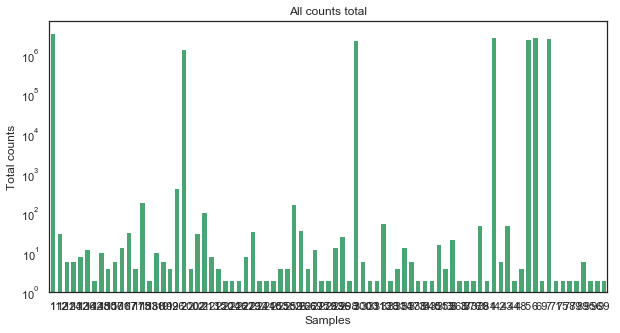

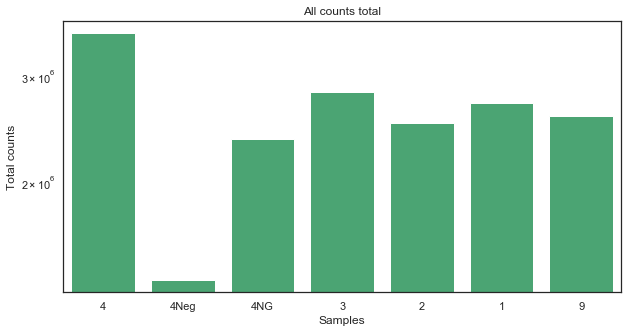

In [42]:
sums_cells_all_s = clone5_s.sum(axis=0)
sums_cells_all = clone5.sum(axis=0)

#all counts total
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all.index, y=sums_cells_all, log='y',color='mediumseagreen')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#all counts total
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all_s.index, y=sums_cells_all_s, log='y',color='mediumseagreen')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

# Plot QC

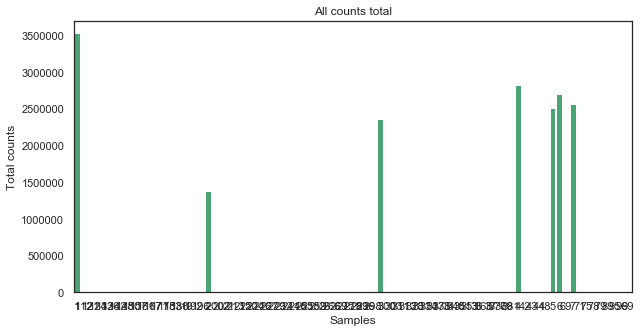

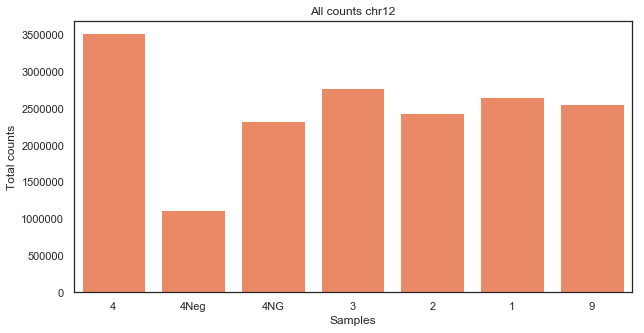

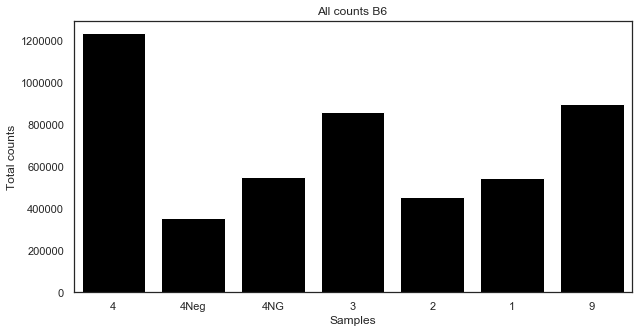

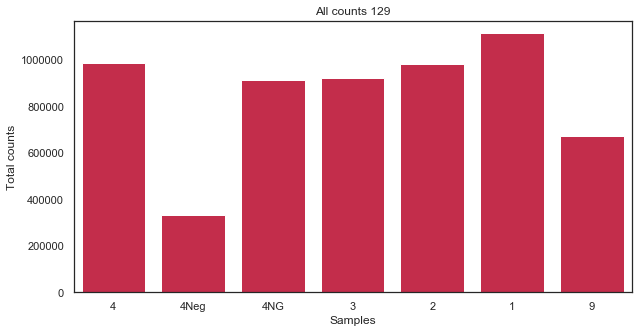

In [43]:
sums_cells_all = clone5.sum(axis=0)
sums_cells_12 = sf.sum(axis=0)
sums_cells_B6 = sf_B6.sum(axis=0)
sums_cells_129 = sf_129.sum(axis=0)

#all counts total
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all.index, y=sums_cells_all, color='mediumseagreen')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#all counts chromosome 12
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_12.index, y=sums_cells_12, color="coral")
ax.set_title('All counts chr12')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

# all counts per allele
#sf.loc['C57BL_6NJ']
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_B6.index, y=sums_cells_B6, color='black')
ax.set_title('All counts B6')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#sf.loc['129S1_SvImJ'].sum(axis=0)
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_129.index, y=sums_cells_129, color='crimson')
ax.set_title('All counts 129')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

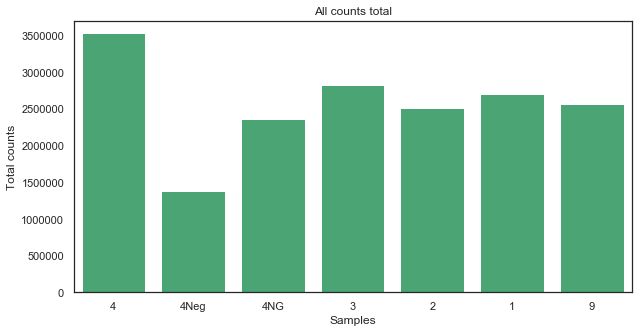

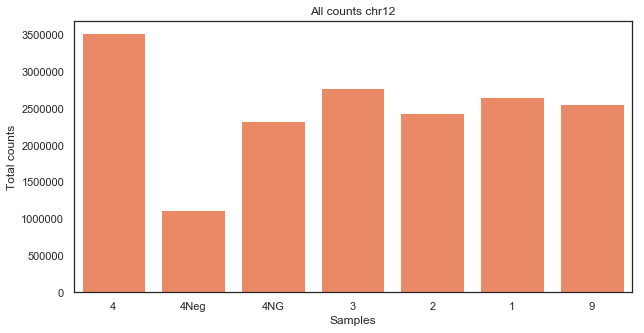

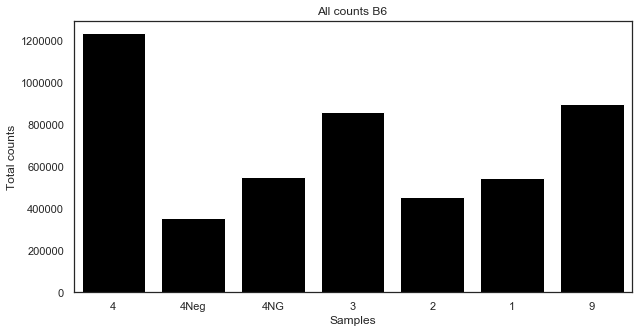

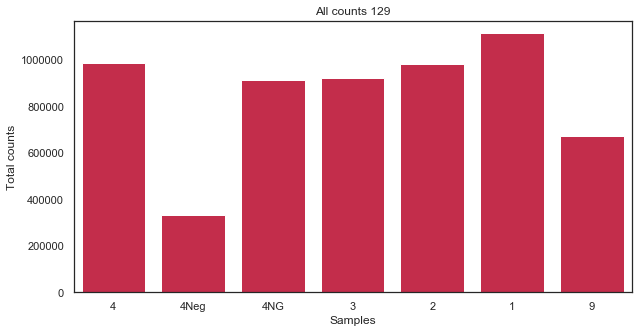

In [44]:
sf = clone5_s.loc['12']

sf_129 = sf.loc['129S1_SvImJ']
sf_B6 = sf.loc['C57BL_6NJ']

nonallelic = sf.drop(['C57BL_6NJ','129S1_SvImJ','129S1_SvImJ,C57BL_6NJ'])

indexNonAllelic = nonallelic.index.droplevel(0)
sf_nonallelic = nonallelic.copy()
sf_nonallelic.index = indexNonAllelic

sums_cells_all = clone5_s.sum(axis=0)
sums_cells_12 = sf.sum(axis=0)
sums_cells_B6 = sf_B6.sum(axis=0)
sums_cells_129 = sf_129.sum(axis=0)

#all counts total
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_all.index, y=sums_cells_all, color='mediumseagreen')
ax.set_title('All counts total')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#all counts chromosome 12
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_12.index, y=sums_cells_12, color="coral")
ax.set_title('All counts chr12')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

# all counts per allele
#sf.loc['C57BL_6NJ']
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_B6.index, y=sums_cells_B6, color='black')
ax.set_title('All counts B6')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

#sf.loc['129S1_SvImJ'].sum(axis=0)
sns.set(style="white")
plt.figure(figsize=(10,5))
ax = sns.barplot(x=sums_cells_129.index, y=sums_cells_129, color='crimson')
ax.set_title('All counts 129')
ax.set(xlabel='Samples', ylabel='Total counts')
plt.show()

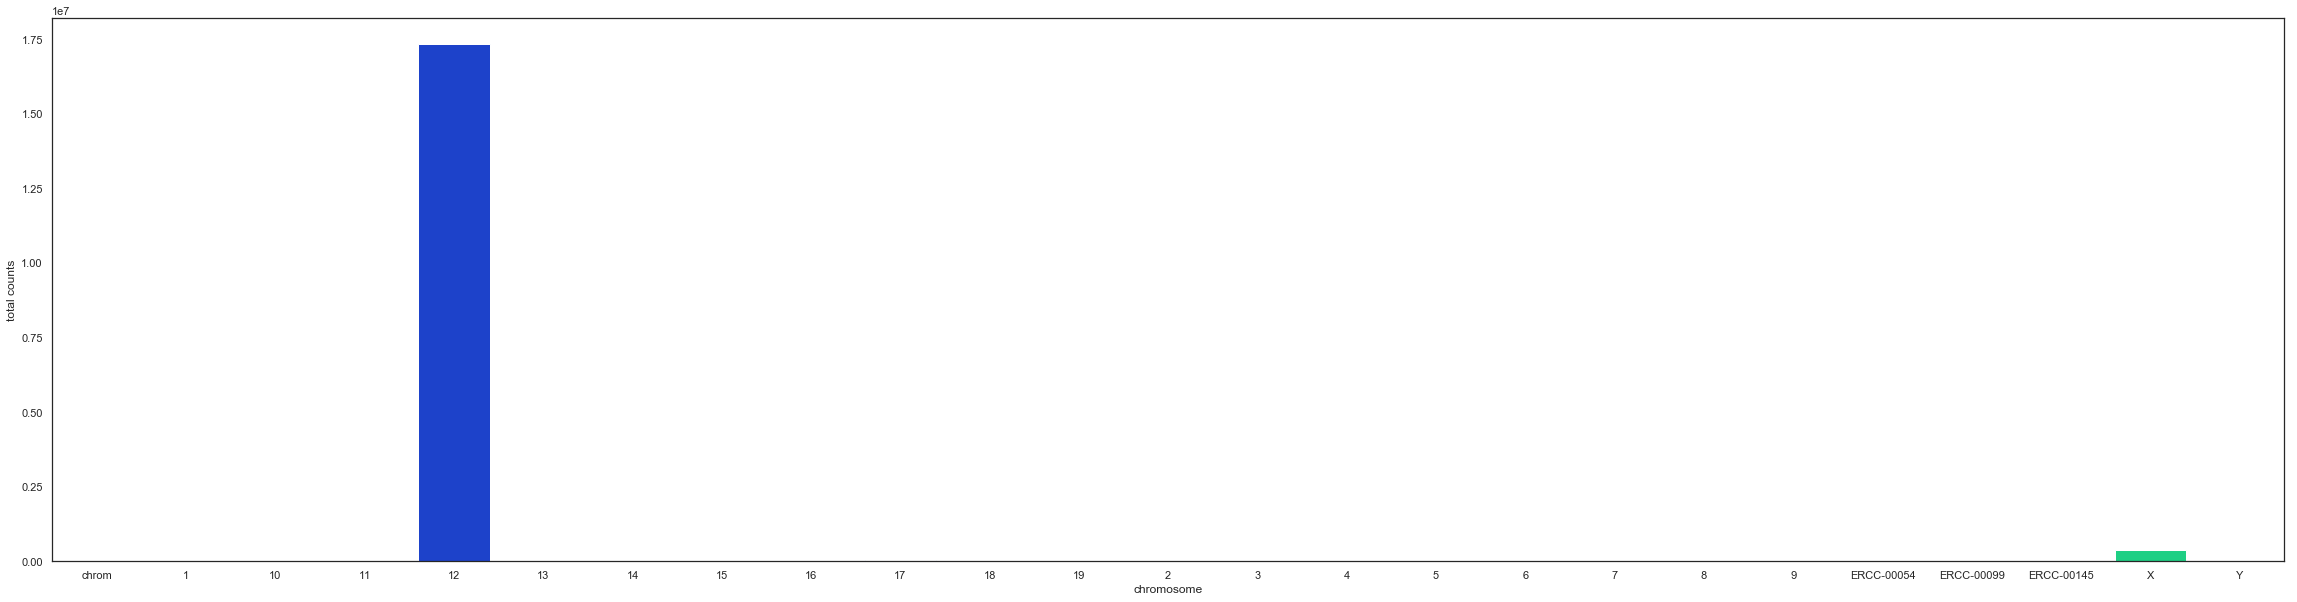

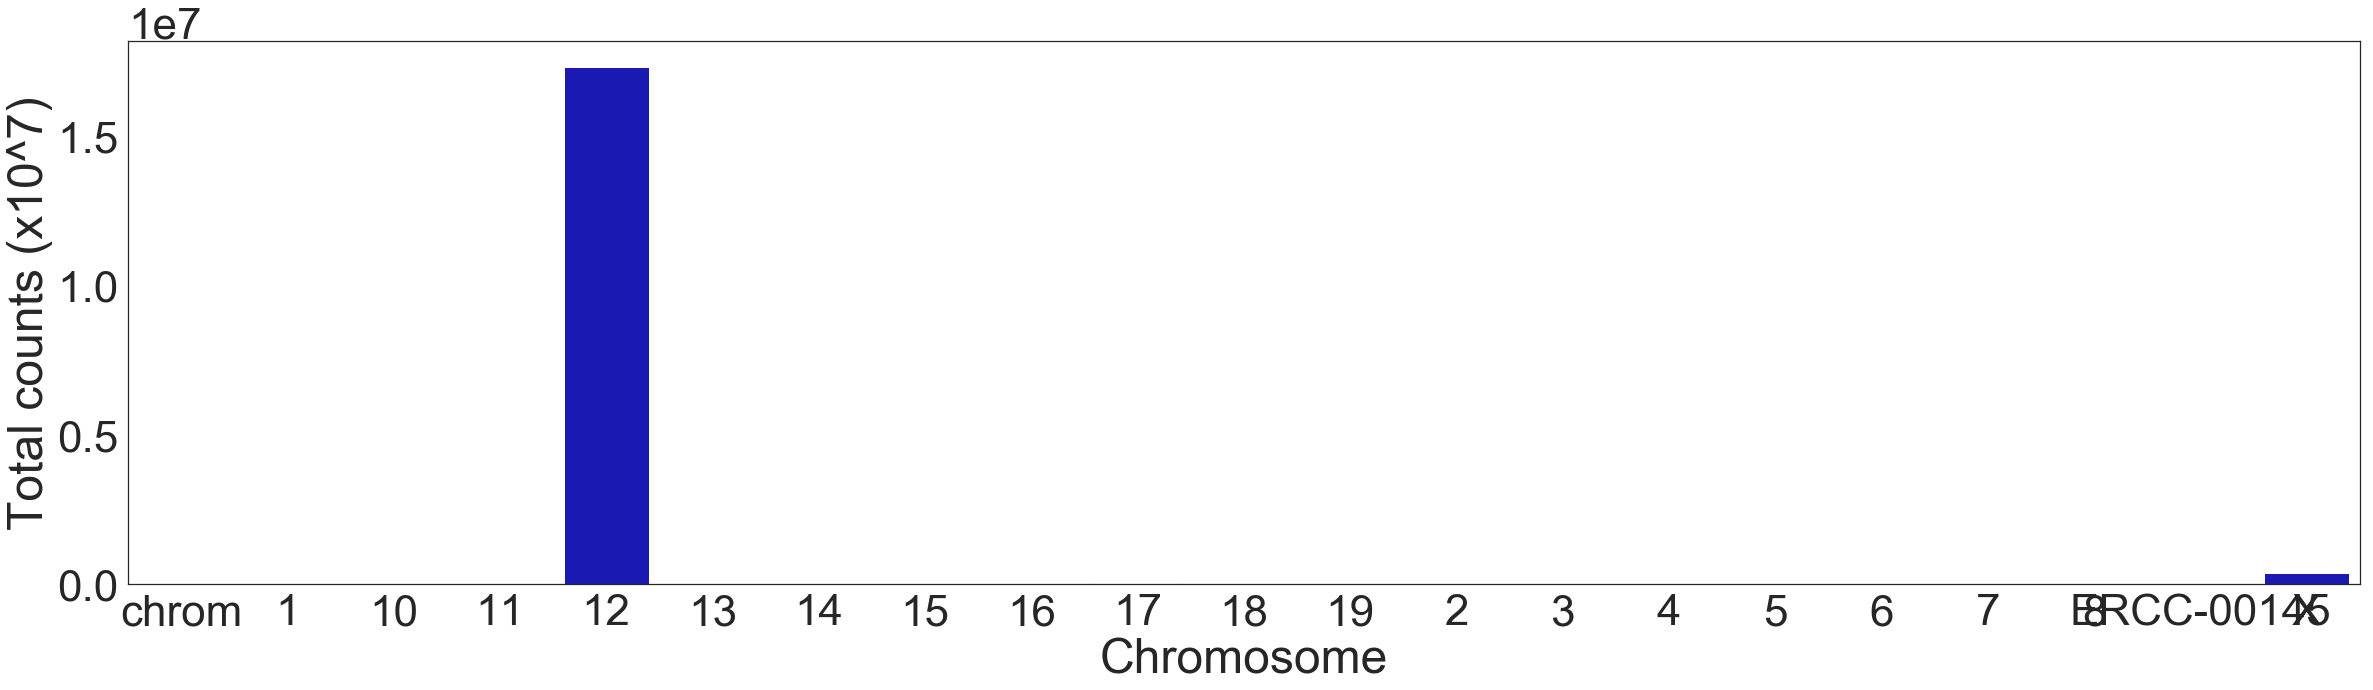

In [45]:
#Plot raw counts per chromosome
sums_cells = clone5.sum(axis=0, level=0)
countsPerChrom = sums_cells.sum(axis=1)
selection = countsPerChrom.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,22,23]]
#myorder=[0,11,12,13,14,15,16,17,18,1,2,3,4,5,6,7,8,9,10,19,20,]
#selection.index = [ selection.index[i] for i in myorder]

sns.set(style="white")
plt.figure(figsize=(40,10))
ax = sns.barplot(x=countsPerChrom.index, y=countsPerChrom, palette="winter")
ax.set(xlabel='chromosome', ylabel='total counts')
plt.show()

sns.set(style="white", font_scale=4)
plt.figure(figsize=(40,10))
#ax = sns.barplot(x=selection.index, y=selection, palette="winter")
ax = sns.barplot(x=selection.index, y=selection, color='mediumblue')
ax.set(xlabel='Chromosome', ylabel='Total counts (x10^7)')
#ax.tick_params(labelsize=17.5)
#plt.xlabel('Chromosome', fontsize=32); plt.ylabel('Total counts', fontsize=32)

plt.show()

# Calculate percentages

In [46]:
sitesB6 = []
sites129 = []
sitesNA = []
for (chrom,allele,site,scar) in clone5_s.index:
    if chrom == '12':
        if allele == 'C57BL_6NJ':
            if site not in sitesB6:
                sitesB6.append(site)
        if allele == '129S1_SvImJ':
            if site not in sites129:
                sites129.append(site)
        if allele != 'C57BL_6NJ' and allele != '129S1_SvImJ' and allele !='129S1_SvImJ,C57BL_6NJ' :
            if site not in sitesNA:
                sitesNA.append(site)

In [47]:
#129
sf_129 = sf_129.fillna(0)
cellToSiteToScarPercentage129 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_129.columns:
    for site in sites129:
        if len(sf_129.loc[site])==0:
            continue
        totalReadsForThisSite = sf_129.loc[site, sample].sum()
        if totalReadsForThisSite == 0:
            continue
        for scar, amountOfReads in sf_129.loc[site,sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage>0.1:
                cellToSiteToScarPercentage129[sample][int(site)][scar] += percentage

#129
percentagesChrom12 = collections.defaultdict(dict) # (cell, gastruloid)->(site,scar)-> value (.. ,1,2)

for sample, allSitesForThisCell in cellToSiteToScarPercentage129.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(500):
            percentagesChrom12[sample][(site,scar)] = percentage

percentagesChr12_129 = pd.DataFrame(percentagesChrom12)

In [48]:
#B6
sf_B6 = sf_B6.fillna(0)
cellToSiteToScarPercentageB6 = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_B6.columns:
    for site in sitesB6:
        if len(sf_B6.loc[site])==0:
            continue
        totalReadsForThisSite = sf_B6.loc[site, sample].sum()
        if totalReadsForThisSite == 0:
            continue
        for scar, amountOfReads in sf_B6.loc[site,sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage>0.1:
                cellToSiteToScarPercentageB6[sample][int(site)][scar] += percentage


percentagesChr12B6 = collections.defaultdict(dict) # (cell, gastruloid)->(site,scar)-> value (.. ,1,2)
for sample, allSitesForThisCell in cellToSiteToScarPercentageB6.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(500):
            percentagesChr12B6[sample][(site,scar)] = percentage

percentagesChr12_B6 = pd.DataFrame(percentagesChr12B6)


In [49]:
#nonallelic
sf_nonallelic = sf_nonallelic.fillna(0)                
cellToSiteToScarPercentageNA = collections.defaultdict(lambda: collections.defaultdict(collections.Counter ))
for sample in sf_nonallelic.columns:
    for site in sitesNA:
        if len(sf_nonallelic.loc[site])==0:
            continue
        totalReadsForThisSite = sf_nonallelic.loc[site, sample].sum()
        if totalReadsForThisSite == 0:
            continue
        for scar, amountOfReads in sf_nonallelic.loc[site,sample].iteritems():
            percentage = (amountOfReads / totalReadsForThisSite)*100.0
            if percentage>0.1:
                cellToSiteToScarPercentageNA[sample][int(site)][scar] += percentage

percentagesChr12NA = collections.defaultdict(dict) # (cell, gastruloid)->(site,scar)-> value (.. ,1,2)
for sample, allSitesForThisCell in cellToSiteToScarPercentageNA.items():
    for site, allScarsForThisSite in allSitesForThisCell.items():
        for scar, percentage in allScarsForThisSite.most_common(500):
            percentagesChr12NA[sample][(site,scar)] = percentage

percentagesChr12_NA = pd.DataFrame(percentagesChr12NA)


# plotting

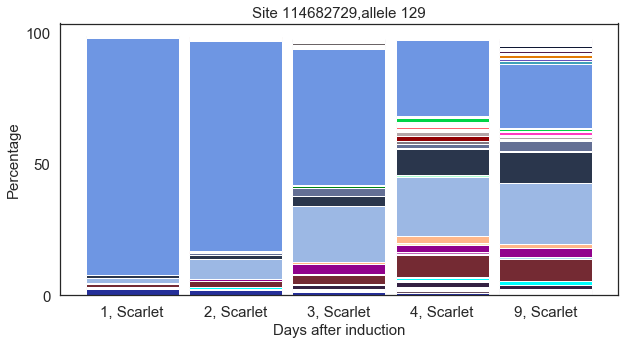

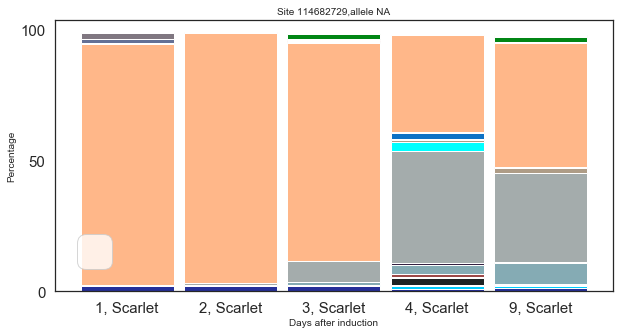

In [22]:
order = [5,4,3,0,6]
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114682729].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)
orderedpercentagepersite129pd = percentagepersite129pd.iloc[order]


ax = orderedpercentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=15)
ax.set_title('Site 114682729,allele 129', fontsize=15)
ax.set_ylabel("Percentage",fontsize=15)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([],frameon=False)

#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][114682729].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)
orderedpercentagepersiteNApd = percentagepersiteNApd.iloc[order]

ax = orderedpercentagepersiteNApd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=10)
ax.set_title('Site 114682729,allele NA', fontsize=10)
ax.set_ylabel("Percentage",fontsize=10)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([])

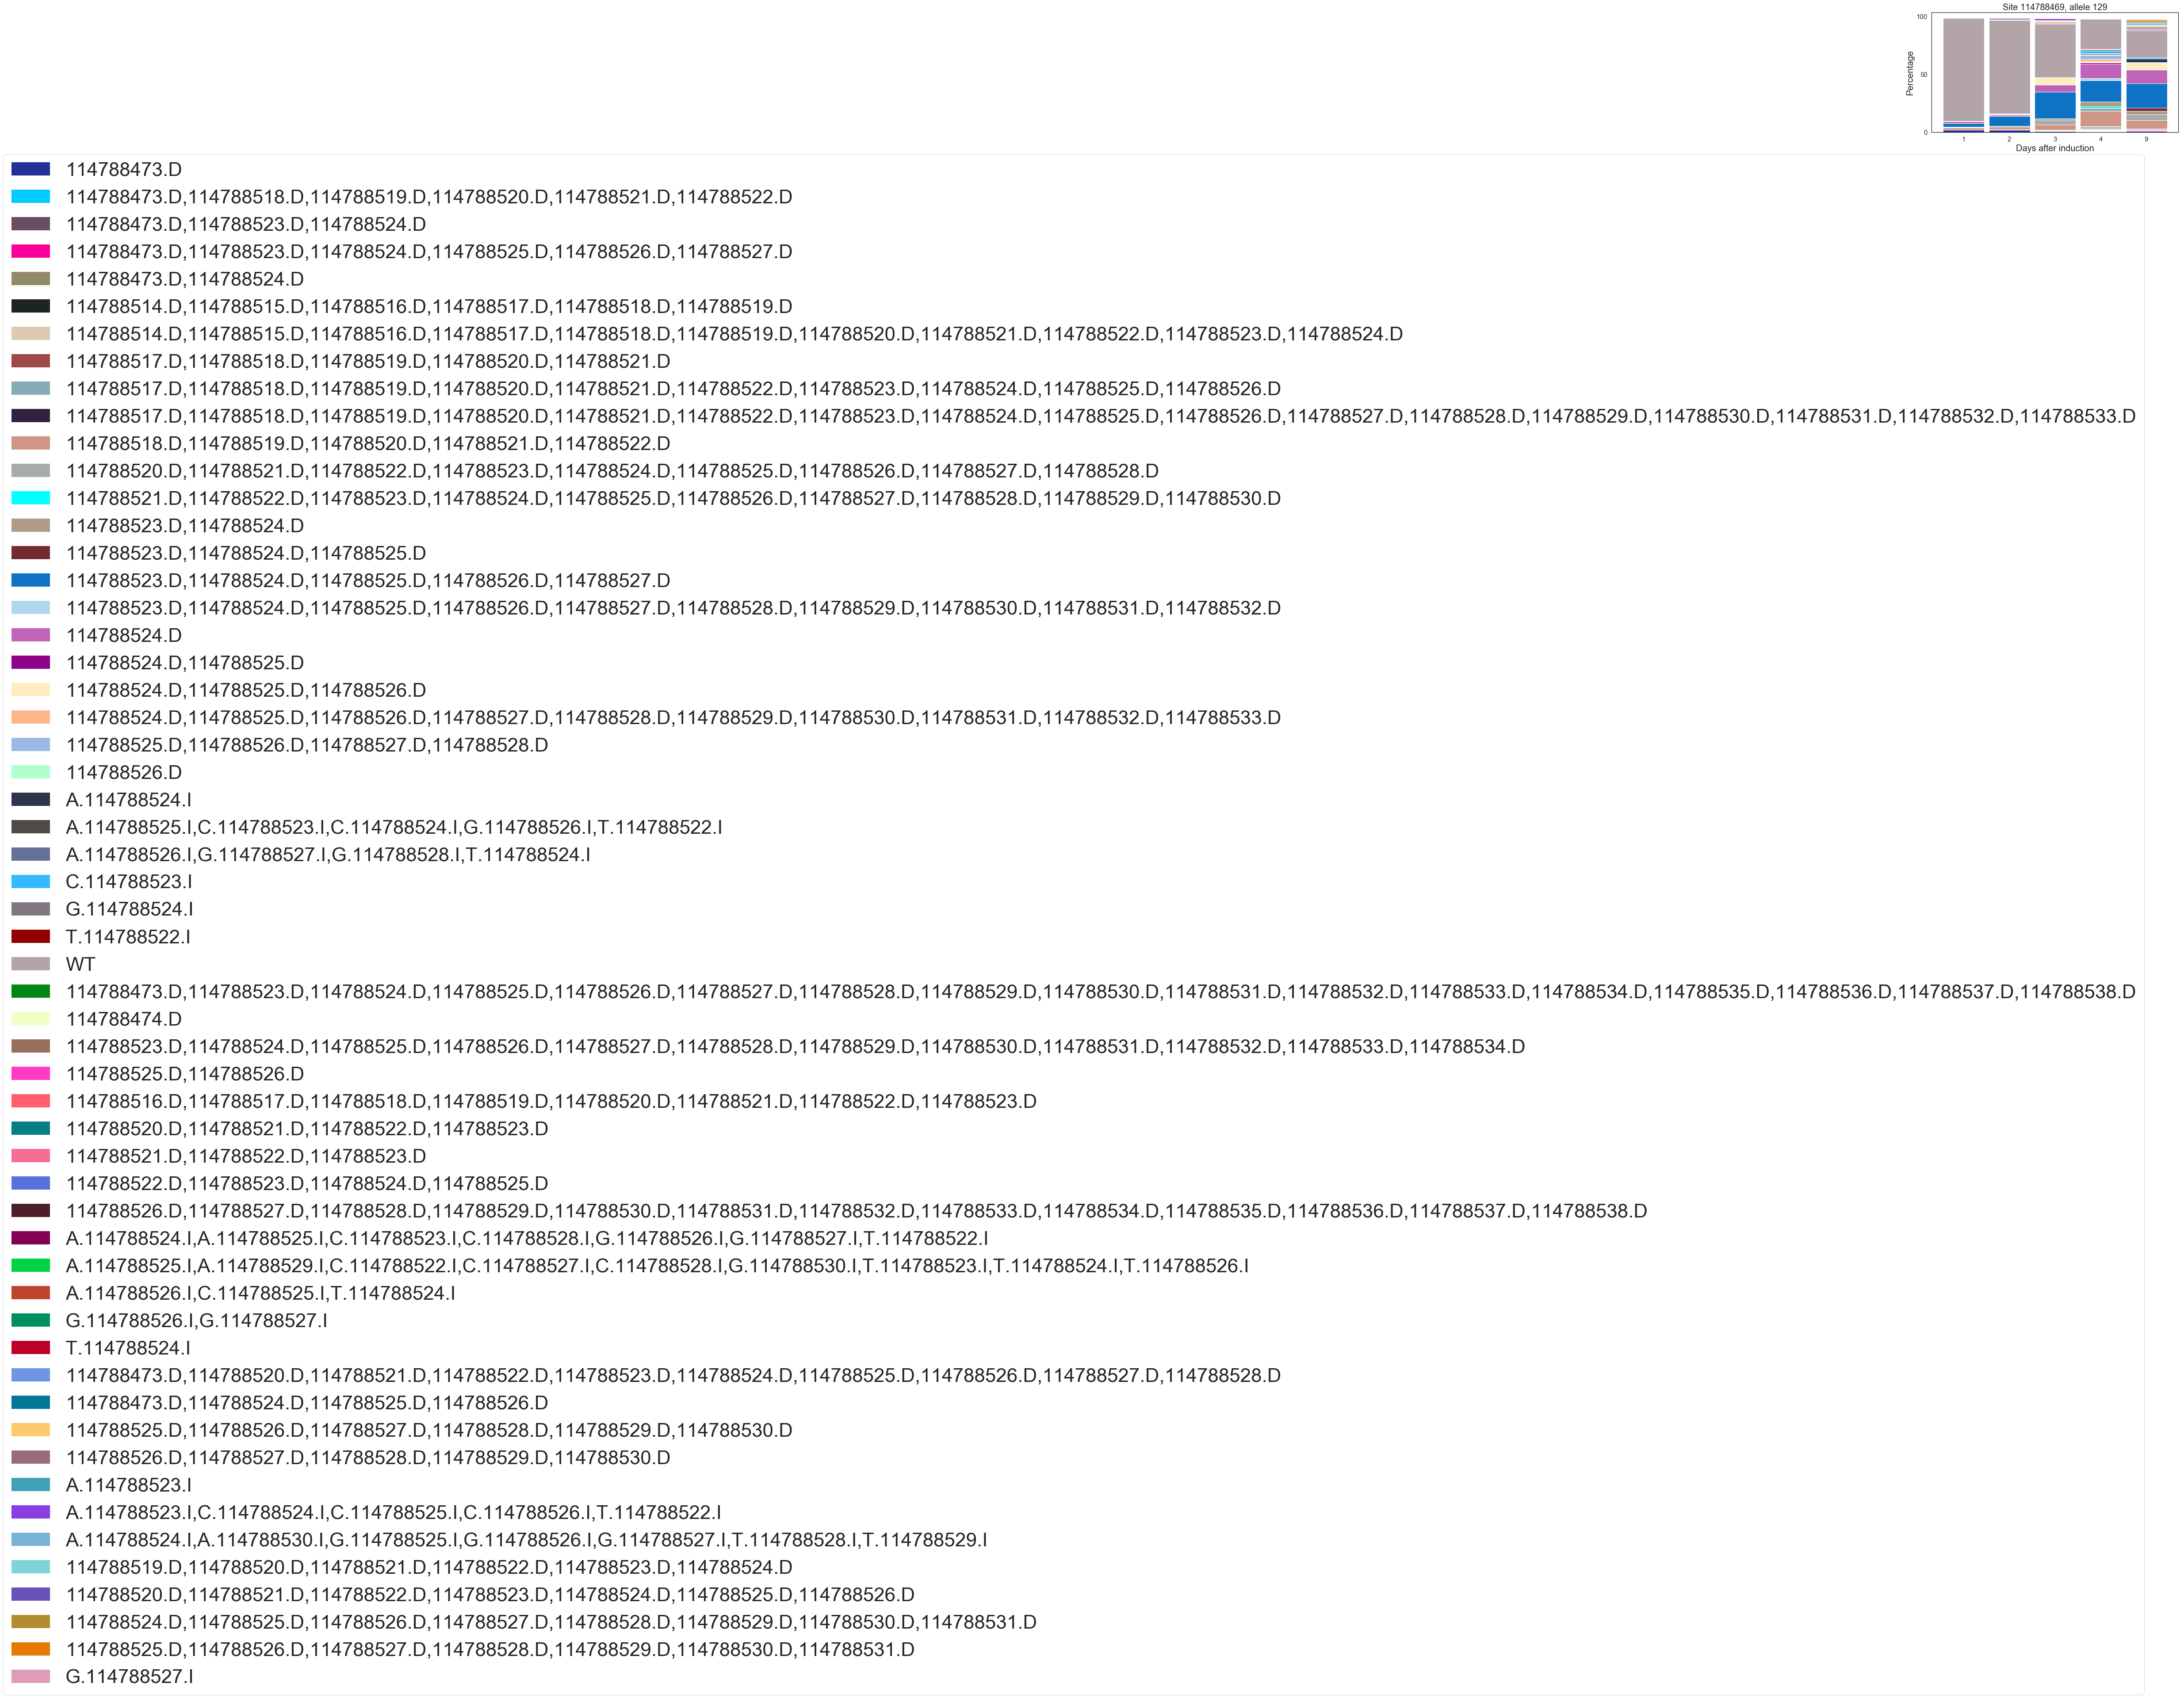

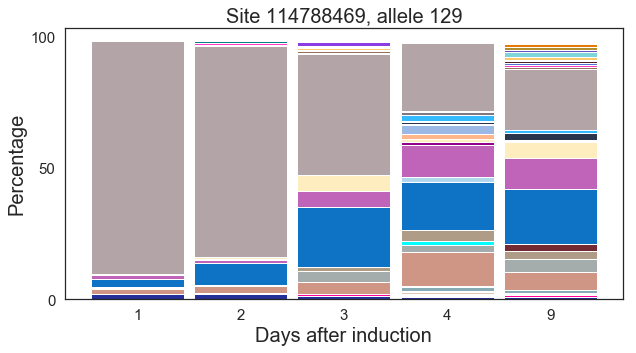

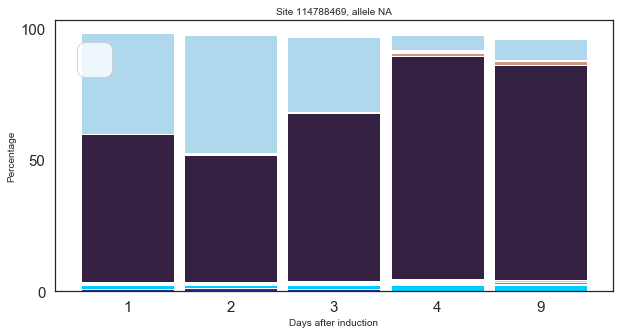

In [51]:
#plotting percentages
percentagepersite = []
for cell in percentagesChr12_129:
    percentagepersite.append(percentagesChr12_129[cell][114788469].dropna())

percentagepersitepd = pd.DataFrame(percentagepersite)
orderedpercentagepersitepd = percentagepersitepd.iloc[order]

ax = orderedpercentagepersitepd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=20)
ax.set_title('Site 114788469, allele 129', fontsize=20)
ax.set_ylabel("Percentage",fontsize=20)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([],frameon=False)

#plotting percentages
percentagepersite = []
for cell in percentagesChr12_129:
    percentagepersite.append(percentagesChr12_129[cell][114788469].dropna())

percentagepersitepd = pd.DataFrame(percentagepersite)
orderedpercentagepersitepd = percentagepersitepd.iloc[order]

ax = orderedpercentagepersitepd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=20)
ax.set_title('Site 114788469, allele 129', fontsize=20)
ax.set_ylabel("Percentage",fontsize=20)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([],frameon=False)

#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][114788469].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)
orderedpercentagepersiteNApd = percentagepersiteNApd.iloc[order]

ax = orderedpercentagepersiteNApd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=10)
ax.set_title('Site 114788469, allele NA', fontsize=10)
ax.set_ylabel("Percentage",fontsize=10)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([])

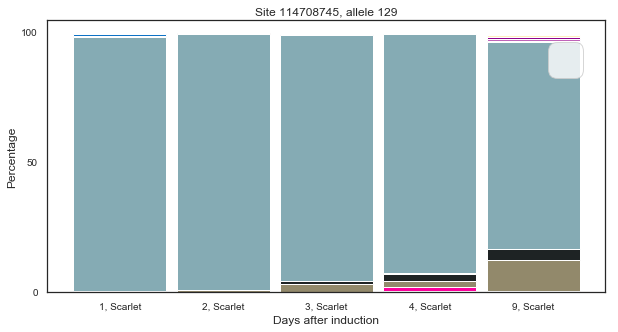

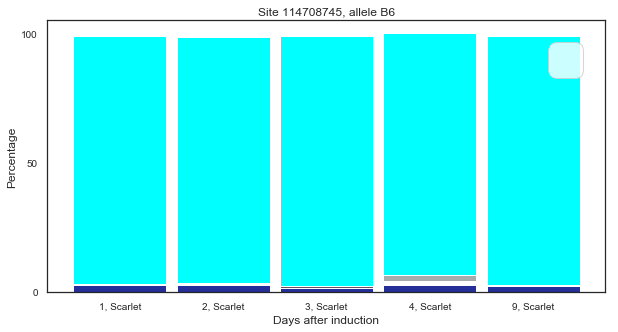

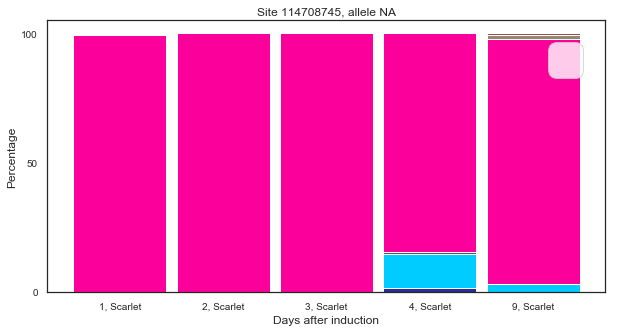

In [25]:
order = [5,4,3,0,6]
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114708745].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)
orderedpercentagepersite129pd = percentagepersite129pd.iloc[order]


ax = orderedpercentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114708745, allele 129', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([])

#plotting percentages B6
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114708745].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
orderedpercentagepersiteB6pd = percentagepersiteB6pd.iloc[order]


ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114708745, allele B6', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([])


#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][114708745].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)
orderedpercentagepersiteNApd = percentagepersiteNApd.iloc[order]

ax = orderedpercentagepersiteNApd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114708745, allele NA', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([])

In [20]:
#percentagesChr12_129.filter(regex=r'114708745', axis=0)

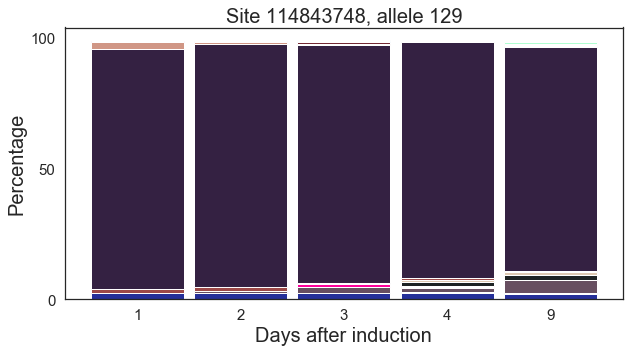

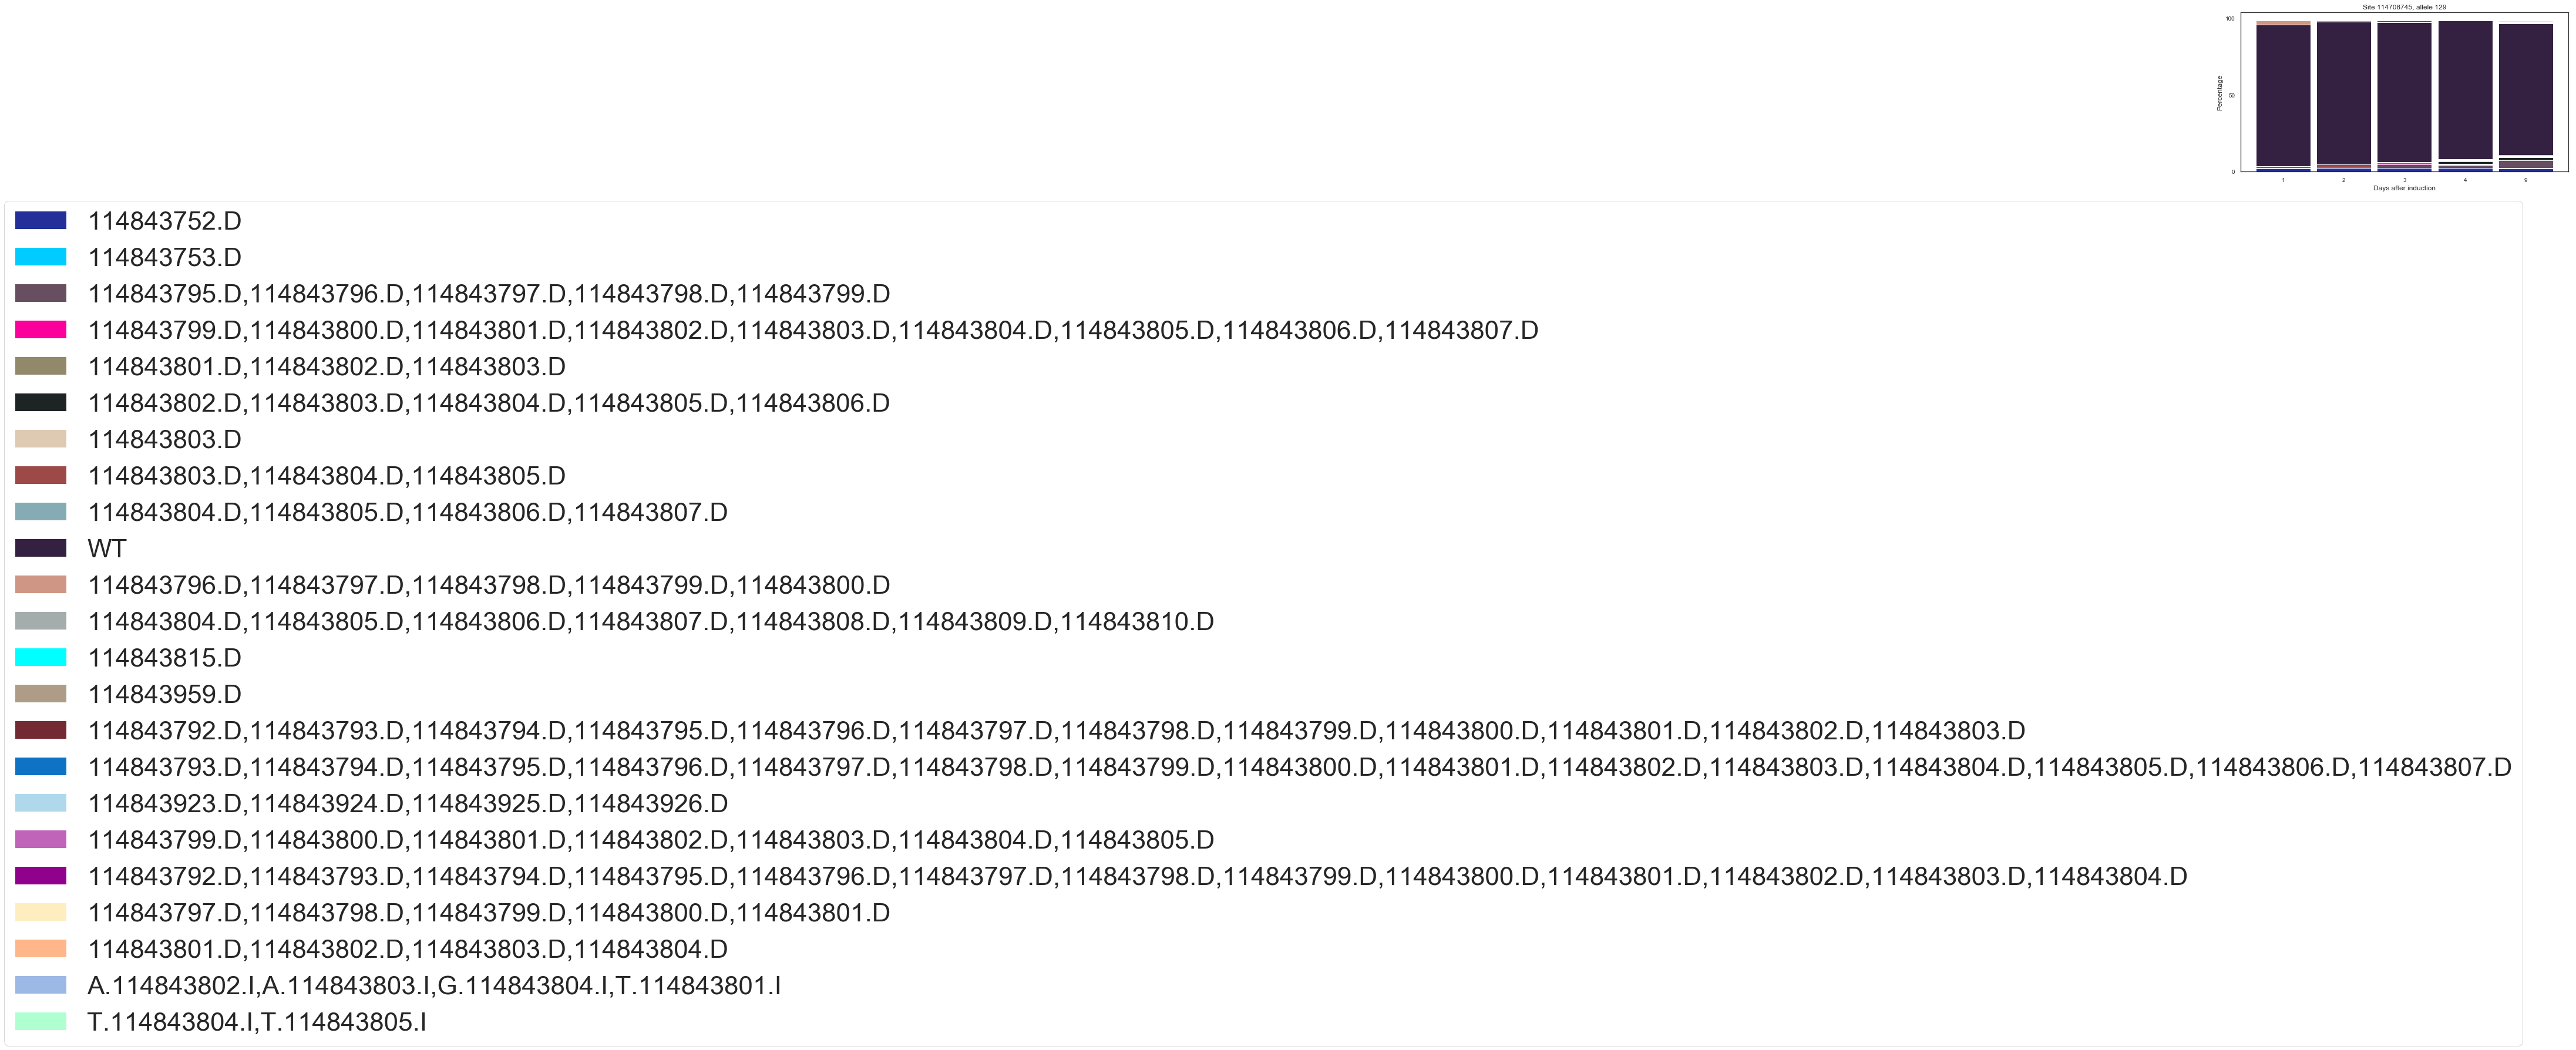

In [52]:
#plotting percentages
percentagepersite = []
for cell in percentagesChr12_129:
    percentagepersite.append(percentagesChr12_129[cell][114843748].dropna())

percentagepersitepd = pd.DataFrame(percentagepersite)
orderedpercentagepersitepd = percentagepersitepd.iloc[order]

ax = orderedpercentagepersitepd.plot.bar(stacked=True,figsize=(10,5),fontsize = 15,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=20)
ax.set_title('Site 114843748, allele 129', fontsize=20)
ax.set_ylabel("Percentage",fontsize=20)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([],frameon=False)

order = [5,4,3,0,6]
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114843748].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)
orderedpercentagepersite129pd = percentagepersite129pd.iloc[order]


ax = orderedpercentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114708745, allele 129', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(0.9,-0.1))
#ax.legend([])

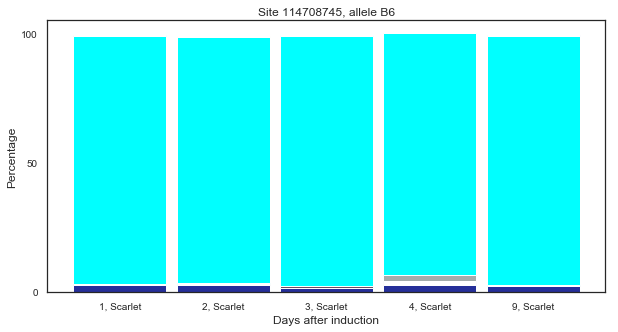

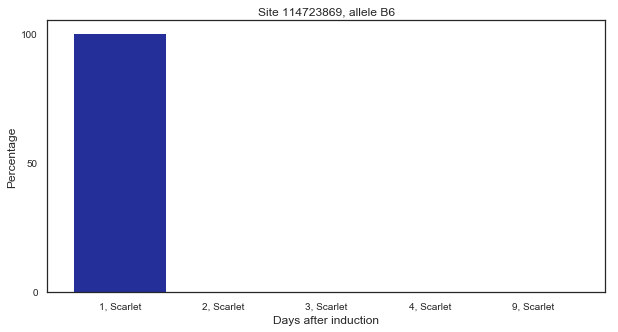

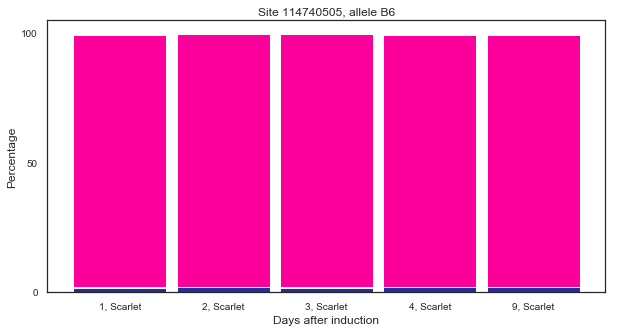

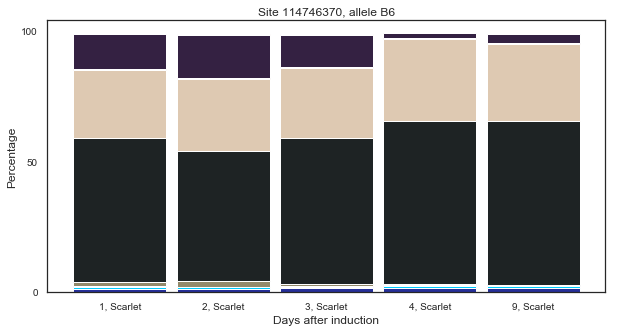

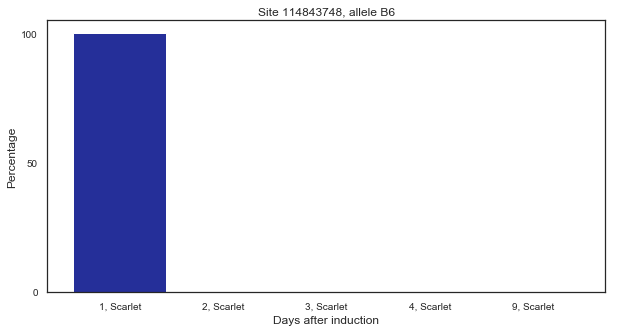

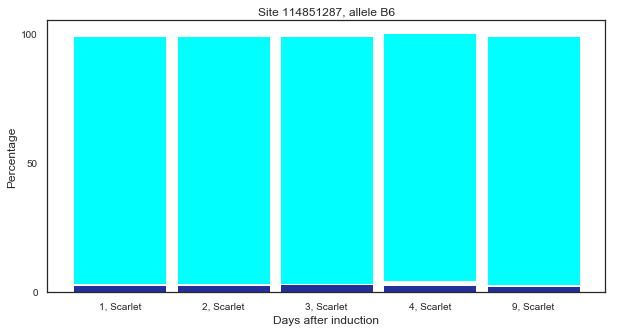

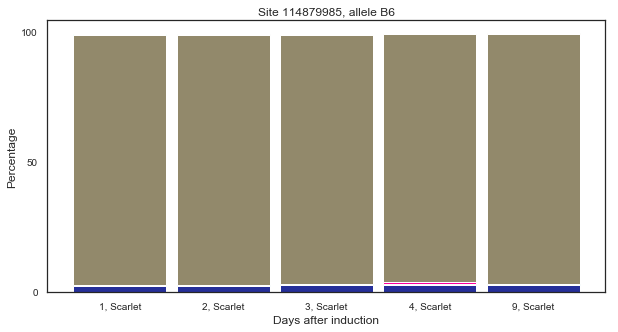

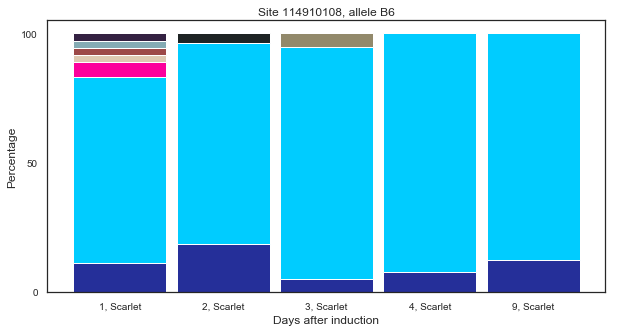

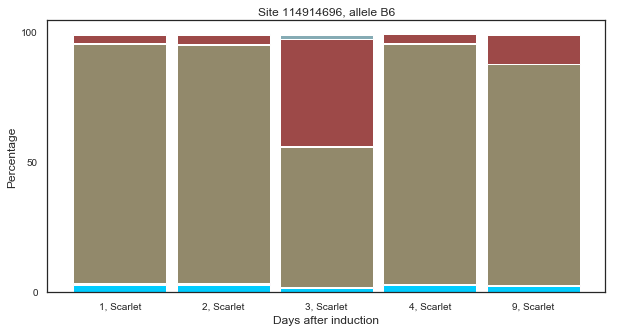

In [35]:
#plotting percentages B6
order = [5,4,3,0,6]
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114708745].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
orderedpercentagepersiteB6pd = percentagepersiteB6pd.iloc[order]


ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114708745, allele B6', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([], frameon=False)

#plotting percentages B6
order = [5,4,3,0,6]
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114723869].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
orderedpercentagepersiteB6pd = percentagepersiteB6pd.iloc[order]


ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114723869, allele B6', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([], frameon=False)

#plotting percentages B6
order = [5,4,3,0,6]
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114740505].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
orderedpercentagepersiteB6pd = percentagepersiteB6pd.iloc[order]


ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114740505, allele B6', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([], frameon=False)

#plotting percentages B6
order = [5,4,3,0,6]
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114746370].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
orderedpercentagepersiteB6pd = percentagepersiteB6pd.iloc[order]


ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114746370, allele B6', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([], frameon=False)

#plotting percentages B6
order = [5,4,3,0,6]
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114843748].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
orderedpercentagepersiteB6pd = percentagepersiteB6pd.iloc[order]


ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114843748, allele B6', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([], frameon=False)

#plotting percentages B6
order = [5,4,3,0,6]
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114851287].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
orderedpercentagepersiteB6pd = percentagepersiteB6pd.iloc[order]


ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114851287, allele B6', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([], frameon=False)

#plotting percentages B6
order = [5,4,3,0,6]
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114879985].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
orderedpercentagepersiteB6pd = percentagepersiteB6pd.iloc[order]


ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114879985, allele B6', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([], frameon=False)

#plotting percentages B6
order = [5,4,3,0,6]
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114910108].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
orderedpercentagepersiteB6pd = percentagepersiteB6pd.iloc[order]


ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114910108, allele B6', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([], frameon=False)

#plotting percentages B6
order = [5,4,3,0,6]
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114914696].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
orderedpercentagepersiteB6pd = percentagepersiteB6pd.iloc[order]


ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114914696, allele B6', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([], frameon=False)



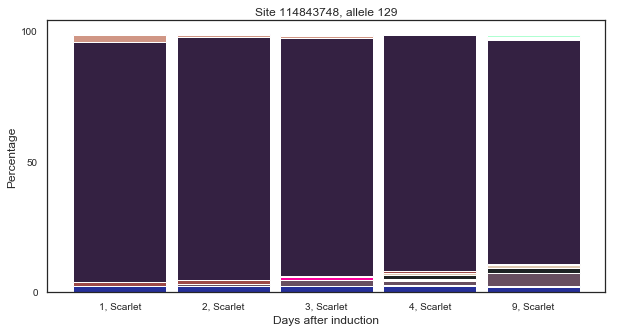

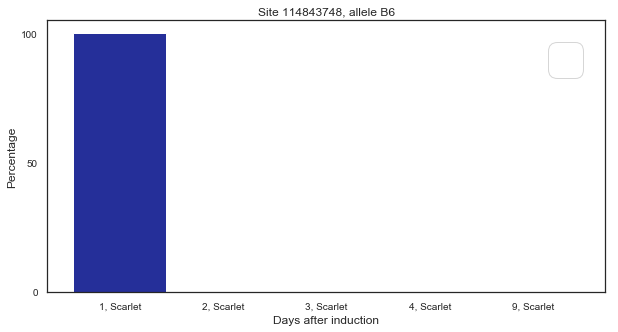

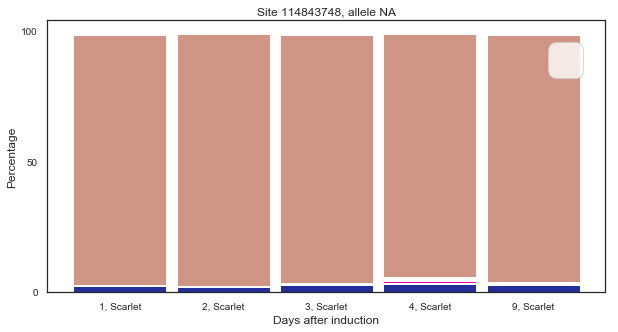

In [35]:
order = [5,4,3,0,6]
#plotting percentages 129
percentagepersite129 = []
for cell in percentagesChr12_129:
    percentagepersite129.append(percentagesChr12_129[cell][114843748].dropna())

percentagepersite129pd = pd.DataFrame(percentagepersite129)
orderedpercentagepersite129pd = percentagepersite129pd.iloc[order]


ax = orderedpercentagepersite129pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114843748, allele 129', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([], frameon=False)

#plotting percentages B6
percentagepersiteB6 = []
for cell in percentagesChr12_B6:
    percentagepersiteB6.append(percentagesChr12_B6[cell][114843748].dropna())

percentagepersiteB6pd = pd.DataFrame(percentagepersiteB6)
orderedpercentagepersiteB6pd = percentagepersiteB6pd.iloc[order]


ax = orderedpercentagepersiteB6pd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114843748, allele B6', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([], frameon=False)


#plotting percentages NA
percentagepersiteNA = []
for cell in percentagesChr12_NA:
    percentagepersiteNA.append(percentagesChr12_NA[cell][114843748].dropna())

percentagepersiteNApd = pd.DataFrame(percentagepersiteNA)
orderedpercentagepersiteNApd = percentagepersiteNApd.iloc[order]

ax = orderedpercentagepersiteNApd.plot.bar(stacked=True,figsize=(10,5),fontsize = 10,width=0.90, color=cols)
ax.set_xlabel("Days after induction",fontsize=12)
ax.set_title('Site 114843748, allele NA', fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.tick_params(axis='x', rotation=0)
#ax.legend(bbox_to_anchor=(0.9,-0.1))
ax.legend([])

In [21]:
cols=[
    "#252F99", "#00CCFF", "#674E60", "#FC009C", "#92896B", "#1E2324", "#DEC9B2", "#9D4948",
    "#85ABB4", "#342142", "#D09685", "#A4ACAC", "#00FFFF", "#AE9C86", "#742A33", "#0E72C5",
    "#AFD8EC", "#C064B9", "#91028C", "#FEEDBF", "#FFB789", "#9CB8E4", "#AFFFD1", "#2A364C",
    "#4F4A43", "#647095", "#34BBFF", "#807781", "#920003", "#B3A5A7", "#018615", "#F1FFC8",
    "#976F5C", "#FF3BC1", "#FF5F6B", "#077D84", "#F56D93", "#5771DA", "#4E1E2A", "#830055",
    "#02D346", "#BE452D", "#00905E", "#BE0028", "#6E96E3", "#007699", "#FEC96D", "#9C6A7D",
    "#3FA1B8", "#893DE3", "#79B4D6", "#7FD4D9", "#6751BB", "#B28D2D", "#E27A05", "#DD9CB8",
    "#AABC7A", "#980034", "#561A02", "#8F7F00", "#635000", "#CD7DAE", "#8A5E2D", "#FFB3E1",
    "#6B6466", "#C6D300", "#0100E2", "#88EC69", "#8FCCBE", "#21001C", "#511F4D", "#E3F6E3",
    "#FF8EB1", "#6B4F29", "#A37F46", "#6A5950", "#1F2A1A", "#04784D", "#101835", "#E6E0D0",
    "#FF74FE", "#00A45F", "#8F5DF8", "#4B0059", "#412F23", "#D8939E", "#DB9D72", "#604143",
    "#B5BACE", "#989EB7", "#D2C4DB", "#A587AF", "#77D796", "#7F8C94", "#FF9B03", "#555196",
    "#31DDAE", "#74B671", "#802647", "#2A373F", "#014A68", "#696628", "#4C7B6D", "#002C27",
    "#7A4522", "#3B5859", "#E5D381", "#FFF3FF", "#679FA0", "#261300", "#2C5742", "#9131AF",
    "#AF5D88", "#C7706A", "#61AB1F", "#8CF2D4", "#C5D9B8", "#9FFFFB", "#BF45CC", "#493941",
    "#863B60", "#B90076", "#003177", "#C582D2", "#C1B394", "#602B70", "#887868", "#BABFB0",
    "#030012", "#D1ACFE", "#7FDEFE", "#4B5C71", "#A3A097", "#E66D53", "#637B5D", "#92BEA5",
    "#00F8B3", "#BEDDFF", "#3DB5A7", "#DD3248", "#B6E4DE", "#427745", "#598C5A", "#B94C59",
    "#8181D5", "#94888B", "#FED6BD", "#536D31", "#6EFF92", "#E4E8FF", "#20E200", "#FFD0F2",
    "#4C83A1", "#BD7322", "#915C4E", "#8C4787", "#025117", "#A2AA45", "#2D1B21", "#A9DDB0",
    "#FF4F78", "#528500", "#009A2E", "#17FCE4", "#71555A", "#525D82", "#00195A", "#967874",
    "#555558", "#0B212C", "#1E202B", "#EFBFC4", "#6F9755", "#6F7586", "#501D1D", "#372D00",
    "#741D16", "#5EB393", "#B5B400", "#DD4A38", "#363DFF", "#AD6552", "#6635AF", "#836BBA",
    "#98AA7F", "#464836", "#322C3E", "#7CB9BA", "#5B6965", "#707D3D", "#7A001D", "#6E4636",
    "#443A38", "#AE81FF", "#489079", "#897334", "#009087", "#DA713C", "#361618", "#FF6F01",
    "#006679", "#370E77", "#4B3A83", "#C9E2E6", "#C44170", "#FF4526", "#73BE54", "#C4DF72",
    "#ADFF60", "#00447D", "#DCCEC9", "#BD9479", "#656E5B", "#EC5200", "#FF6EC2", "#7A617E",
    "#DDAEA2", "#77837F", "#A53327", "#608EFF", "#B599D7", "#A50149", "#4E0025", "#C9B1A9",
    "#03919A", "#1B2A25", "#E500F1", "#982E0B", "#B67180", "#E05859", "#006039", "#578F9B",
    "#305230", "#CE934C", "#B3C2BE", "#C0BAC0", "#B506D3", "#170C10", "#4C534F", "#224451",
    "#3E4141", "#78726D", "#B6602B", "#200441", "#DDB588", "#497200", "#C5AAB6", "#033C61",
    "#71B2F5", "#A9E088", "#4979B0", "#A2C3DF", "#784149", "#2D2B17", "#3E0E2F", "#57344C",
    "#0091BE", "#E451D1", "#4B4B6A", "#5C011A", "#7C8060", "#FF9491", "#4C325D", "#005C8B",
    "green", "#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#006FA6", "#A30059",
    "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
    "#5A0007", "#809693", "#FEFFE6", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
    "#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
    "#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
    "#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
    "#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
    "#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
    "#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
    "#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
    "#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
    "#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
    "#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C",
    "#83AB58", "#001C1E", "#D1F7CE", "#004B28", "#C8D0F6", "#A3A489", "#806C66", "#222800",
    "#BF5650", "#E83000", "#66796D", "#DA007C", "#FF1A59", "#8ADBB4", "#1E0200", "#5B4E51",
    "#C895C5", "#320033", "#FF6832", "#66E1D3", "#CFCDAC", "#D0AC94", "#7ED379", "#012C58",
    "#7A7BFF", "#D68E01", "#353339", "#78AFA1", "#FEB2C6", "#75797C", "#837393", "#943A4D",
    "#B5F4FF", "#D2DCD5", "#9556BD", "#6A714A", "#001325", "#02525F", "#0AA3F7", "#E98176",
    "#DBD5DD", "#5EBCD1", "#3D4F44", "#7E6405", "#02684E", "#962B75", "#8D8546", "#9695C5",
    "#E773CE", "#D86A78", "#3E89BE", "#CA834E", "#518A87", "#5B113C", "#55813B", "#E704C4",
    "#00005F", "#A97399", "#4B8160", "#59738A", "#FF5DA7", "#F7C9BF", "#643127", "#513A01",
    "#6B94AA", "#51A058", "#A45B02", "#1D1702", "#E20027", "#E7AB63", "#4C6001", "#9C6966",
    "#64547B", "#97979E", "#006A66", "#391406", "#F4D749", "#0045D2", "#006C31", "#DDB6D0",
    "#7C6571", "#9FB2A4", "#00D891", "#15A08A", "#BC65E9", "#FFFFFE", "#C6DC99", "#203B3C",
    "#671190", "#6B3A64", "#F5E1FF", "#FFA0F2", "#CCAA35", "#374527", "#8BB400", "#797868",
    "#C6005A", "#3B000A", "#C86240", "#29607C", "#402334", "#7D5A44", "#CCB87C", "#B88183",
    "#AA5199", "#B5D6C3", "#A38469", "#9F94F0", "#A74571", "#B894A6", "#71BB8C", "#00B433",
    "#789EC9", "#6D80BA", "#953F00", "#5EFF03", "#E4FFFC", "#1BE177", "#BCB1E5", "#76912F",
    "#003109", "#0060CD", "#D20096", "#895563", "#29201D", "#5B3213", "#A76F42", "#89412E",
    "#1A3A2A", "#494B5A", "#A88C85", "#F4ABAA", "#A3F3AB", "#00C6C8", "#EA8B66", "#958A9F",
    "#BDC9D2", "#9FA064", "#BE4700", "#658188", "#83A485", "#453C23", "#47675D", "#3A3F00",
    "#061203", "#DFFB71", "#868E7E", "#98D058", "#6C8F7D", "#D7BFC2", "#3C3E6E", "#D83D66",
    "#2F5D9B", "#6C5E46", "#D25B88", "#5B656C", "#00B57F", "#545C46", "#866097", "#365D25",
    "#E5FDA4", "#68D1B6", "#032641", "#140023", "#8683A9", "#CFFF00", "#A72C3E", "#34475A",
    "#B1BB9A", "#B4A04F", "#8D918E", "#A168A6", "#813D3A", "#425218", "#DA8386", "#776133",
    "#563930", "#8498AE", "#90C1D3", "#B5666B", "#9B585E", "#856465", "#AD7C90", "#E2BC00",
    "#E3AAE0", "#B2C2FE", "#FD0039", "#009B75", "#FFF46D", "#E87EAC", "#DFE3E6", "#848590",
    "#AA9297", "#83A193", "#577977", "#3E7158", "#C64289", "#EA0072", "#C4A8CB", "#55C899",
    "#E78FCF", "#004547", "#F6E2E3", "#966716", "#378FDB", "#435E6A", "#DA0004", "#1B000F",
    "#5B9C8F", "#6E2B52", "#011115", "#E3E8C4", "#AE3B85", "#EA1CA9", "#FF9E6B", "#457D8B",
    "#92678B", "#00CDBB", "#9CCC04", "#002E38", "#96C57F", "#CFF6B4", "#492818", "#766E52",
    "#20370E", "#E3D19F", "#2E3C30", "#B2EACE", "#F3BDA4", "#A24E3D", "#976FD9", "#8C9FA8",
    "#7C2B73", "#4E5F37", "#5D5462", "#90956F", "#6AA776", "#DBCBF6", "#DA71FF", "#987C95",
    "#52323C", "#BB3C42", "#584D39", "#4FC15F", "#A2B9C1", "#79DB21", "#1D5958", "#BD744E",
    "#160B00", "#20221A", "#6B8295", "#00E0E4", "#102401", "#1B782A", "#DAA9B5", "#B0415D",
    "#859253", "#97A094", "#06E3C4", "#47688C", "#7C6755", "#075C00", "#7560D5", "#7D9F00",
    "#C36D96", "#4D913E", "#5F4276", "#FCE4C8", "#303052", "#4F381B", "#E5A532", "#706690",
    "#AA9A92", "#237363", "#73013E", "#FF9079", "#A79A74", "#029BDB", "#FF0169", "#C7D2E7",
    "#CA8869", "#80FFCD", "#BB1F69", "#90B0AB", "#7D74A9", "#FCC7DB", "#99375B", "#00AB4D",
    "#ABAED1", "#BE9D91", "#E6E5A7", "#332C22", "#DD587B", "#F5FFF7", "#5D3033", "#6D3800",
    "#FF0020", "#B57BB3", "#D7FFE6", "#C535A9", "#260009", "#6A8781", "#A8ABB4", "#D45262",
    "#794B61", "#4621B2", "#8DA4DB", "#C7C890", "#6FE9AD", "#A243A7", "#B2B081", "#181B00",
    "#286154", "#4CA43B", "#6A9573", "#A8441D", "#5C727B", "#738671", "#D0CFCB", "#897B77",
    "#1F3F22", "#4145A7", "#DA9894", "#A1757A", "#63243C", "#ADAAFF", "#00CDE2", "#DDBC62",
    "#698EB1", "#208462", "#00B7E0", "#614A44", "#9BBB57", "#7A5C54", "#857A50", "#766B7E",
    "#014833", "#FF8347", "#7A8EBA", "#274740", "#946444", "#EBD8E6", "#646241", "#373917",
    "#6AD450", "#81817B", "#D499E3", "#979440", "#011A12", "#526554", "#B5885C", "#A499A5",
    "#03AD89", "#B3008B", "#E3C4B5", "#96531F", "#867175", "#74569E", "#617D9F", "#E70452",
    "#067EAF", "#A697B6", "#B787A8", "#9CFF93", "#311D19", "#3A9459", "#6E746E", "#B0C5AE",
    "#84EDF7", "#ED3488", "#754C78", "#384644", "#C7847B", "#00B6C5", "#7FA670", "#C1AF9E",
    "#2A7FFF", "#72A58C", "#FFC07F", "#9DEBDD", "#D97C8E", "#7E7C93", "#62E674", "#B5639E",
    "#FFA861", "#C2A580", "#8D9C83", "#B70546", "#372B2E", "#0098FF", "#985975", "#20204C",
    "#FF6C60", "#445083", "#8502AA", "#72361F", "#9676A3", "#484449", "#CED6C2", "#3B164A",
    "#CCA763", "#2C7F77", "#02227B", "#A37E6F", "#CDE6DC", "#CDFFFB", "#BE811A", "#F77183",
    "#EDE6E2", "#CDC6B4", "#FFE09E", "#3A7271", "#FF7B59", "#4E4E01", "#4AC684", "#8BC891",
    "#BC8A96", "#CF6353", "#DCDE5C", "#5EAADD", "#F6A0AD", "#E269AA", "#A3DAE4", "#436E83",
    "#002E17", "#ECFBFF", "#A1C2B6", "#50003F", "#71695B", "#67C4BB", "#536EFF", "#5D5A48",
    "#890039", "#969381", "#371521", "#5E4665", "#AA62C3", "#8D6F81", "#2C6135", "#410601",
    "#564620", "#E69034", "#6DA6BD", "#E58E56", "#E3A68B", "#48B176", "#D27D67", "#B5B268",
    "#7F8427", "#FF84E6", "#435740", "#EAE408", "#F4F5FF", "#325800", "#4B6BA5", "#ADCEFF",
    "#9B8ACC", "#885138", "#5875C1", "#7E7311", "#FEA5CA", "#9F8B5B", "#A55B54", "#89006A",
    "#AF756F", "#2A2000", "#7499A1", "#FFB550", "#00011E", "#D1511C", "#688151", "#BC908A",
    "#78C8EB", "#8502FF", "#483D30", "#C42221", "#5EA7FF", "#785715", "#0CEA91", "#FFFAED",
    "#B3AF9D", "#3E3D52", "#5A9BC2", "#9C2F90", "#8D5700", "#ADD79C", "#00768B", "#337D00",
    "#C59700", "#3156DC", "#944575", "#ECFFDC", "#D24CB2", "#97703C", "#4C257F", "#9E0366",
    "#88FFEC", "#B56481", "#396D2B", "#56735F", "#988376", "#9BB195", "#A9795C", "#E4C5D3",
    "#9F4F67", "#1E2B39", "#664327", "#AFCE78", "#322EDF", "#86B487", "#C23000", "#ABE86B",
    "#96656D", "#250E35", "#A60019", "#0080CF", "#CAEFFF", "#323F61", "#A449DC", "#6A9D3B",
    "#FF5AE4", "#636A01", "#D16CDA", "#736060", "#FFBAAD", "#D369B4", "#FFDED6", "#6C6D74",
    "#927D5E", "#845D70", "#5B62C1", "#2F4A36", "#E45F35", "#FF3B53", "#AC84DD", "#762988",
    "#70EC98", "#408543", "#2C3533", "#2E182D", "#323925", "#19181B", "#2F2E2C", "#023C32",
    "#9B9EE2", "#58AFAD", "#5C424D", "#7AC5A6", "#685D75", "#B9BCBD", "#834357", "#1A7B42",
    "#2E57AA", "#E55199", "#316E47", "#CD00C5", "#6A004D", "#7FBBEC", "#F35691", "#D7C54A",
    "#62ACB7", "#CBA1BC", "#A28A9A", "#6C3F3B", "#FFE47D", "#DCBAE3", "#5F816D", "#3A404A",
    "#7DBF32", "#E6ECDC", "#852C19", "#285366", "#B8CB9C", "#0E0D00", "#4B5D56", "#6B543F",
    "#E27172", "#0568EC", "#2EB500", "#D21656", "#EFAFFF", "#682021", "#2D2011", "#DA4CFF",
    "#70968E", "#FF7B7D", "#4A1930", "#E8C282", "#E7DBBC", "#A68486", "#1F263C", "#36574E",
    "#52CE79", "#ADAAA9", "#8A9F45", "#6542D2", "#00FB8C", "#5D697B", "#CCD27F", "#94A5A1",
    "#790229", "#E383E6", "#7EA4C1", "#4E4452", "#4B2C00", "#620B70", "#314C1E", "#874AA6",
    "#E30091", "#66460A", "#EB9A8B", "#EAC3A3", "#98EAB3", "#AB9180", "#B8552F", "#1A2B2F",
    "#94DDC5", "#9D8C76", "#9C8333", "#94A9C9", "#392935", "#8C675E", "#CCE93A", "#917100",
    "#01400B", "#449896", "#1CA370", "#E08DA7", "#8B4A4E", "#667776", "#4692AD", "#67BDA8",
    "#69255C", "#D3BFFF", "#4A5132", "#7E9285", "#77733C", "#E7A0CC", "#51A288", "#2C656A",
    "#4D5C5E", "#C9403A", "#DDD7F3", "#005844", "#B4A200", "#488F69", "#858182", "#D4E9B9",
    "#3D7397", "#CAE8CE", "#D60034", "#AA6746", "#9E5585", "#BA6200"]